# 과제 8
1. p141의 wine_data를 이용하여 MDS, LLE, Isomap, t-SNE의 성능을 비교하라.   
> 각 method로 차원 축소 후 logistic으로 성능 측정

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기. y값은 이미 범주형으로 되어있음.
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
dat_wine.head()
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(dat_wine['class label']))  # Class 출력
dat_wine.head()

class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X, y = dat_wine.iloc[:,1:].values, dat_wine.iloc[:,0].values
X_train, X_test, y_train,y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 13) (54, 13)


In [3]:
# 표준화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [10]:
# 단순 로지스틱
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print(accuracy_score(train_pred, y_train))
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

1.0
0.9814814814814815
[[18  0  0]
 [ 0 20  0]
 [ 0  1 15]]


## 1. MDS
(Multidimensional scaling, 다차원축소)

In [12]:
# 모든 축소 전에 X를 표준화해준다! >> 성능이 훨씬 좋아졌따
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [20]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=10)
X_m = mds.fit_transform(X) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


In [21]:
import warnings
warnings.filterwarnings(action='ignore')

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print(accuracy_score(train_pred, y_train))
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.9193548387096774
0.8703703703703703
[[16  5  0]
 [ 2 16  0]
 [ 0  0 15]]


[]

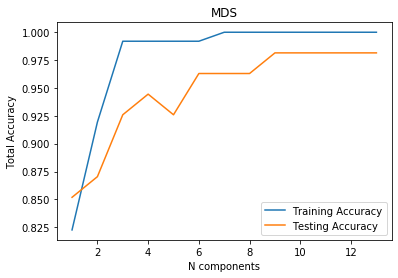

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

for x in c_list:
    mds = MDS(n_components=x, random_state=10)
    X_m = mds.fit_transform(X) # trainsform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('N components') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('MDS')
plt.plot() # Show graph

## 2. LLE
(Locally Linear Embedding, 선형결합 후 차원축소)

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
mds = LocallyLinearEmbedding(n_components=2, random_state=10)
X_m = mds.fit_transform(X) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print(accuracy_score(train_pred, y_train))
print(accuracy_score(pred, y_test))

0.5403225806451613
0.6296296296296297


[]

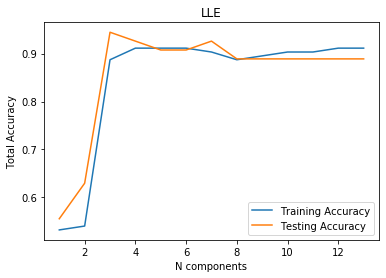

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

for x in c_list:
    mds = LocallyLinearEmbedding(n_components=x, random_state=10)
    X_m = mds.fit_transform(X) # trainsform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('N components') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('LLE')
plt.plot() # Show graph

## 3. Isomap
지도면상의 최소 거리를 활용

In [29]:
from sklearn.manifold import Isomap

mds = Isomap(n_components=2)
X_m = mds.fit_transform(X) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print(accuracy_score(train_pred, y_train))
print(accuracy_score(pred, y_test))

0.9758064516129032
0.9444444444444444


[]

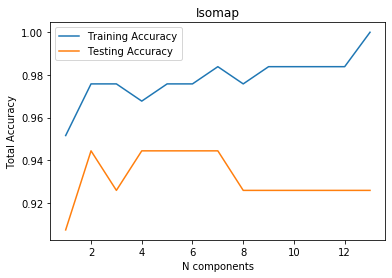

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]

train_errors = [] 
test_errors = [] 

for x in c_list:
    mds = Isomap(n_components=x)
    X_m = mds.fit_transform(X) # trainsform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('N components') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('Isomap')
plt.plot() # Show graph

## 4. T-SNE
(T - distributed Stochastic Neighbor Embedding)

In [35]:
from sklearn.manifold import TSNE

mds = TSNE(n_components=2, random_state=10)
X_m = mds.fit_transform(X) # trainsform > split
X_train, X_test, y_train,y_test = train_test_split(X_m, y, test_size=0.3, random_state=1, stratify=y)

model= LogisticRegression() 
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
pred = model.predict(X_test)
print(accuracy_score(train_pred, y_train))
print(accuracy_score(pred, y_test))

0.9919354838709677
0.9629629629629629


[]

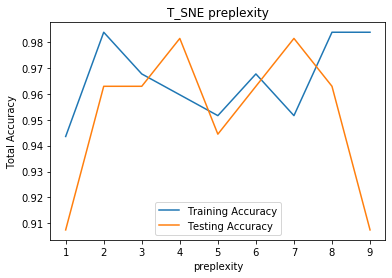

In [44]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

c_list = [5, 10, 15, 20, 25, 30, 35, 40, 50]

train_errors = [] 
test_errors = [] 

for x in c_list:
    mds = TSNE(n_components=2, perplexity=x, random_state=110)
    X_m = mds.fit_transform(X) # trainsform > split
    X_train, X_test, y_train,y_test = train_test_split(X_m, y, 
                                                   test_size=0.3, random_state=1, stratify=y)
    model= LogisticRegression() 
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    pred = model.predict(X_test)
    
    train_errors.append(accuracy_score(y_train, train_pred))
    test_errors.append(accuracy_score(y_test, pred))

x = np.arange(len(c_list)) + 1 # Create domain for plot
plt.plot(x, train_errors, label='Training Accuracy') # Plot training error over domain
plt.plot(x, test_errors, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('preplexity') # Label x-axis
plt.ylabel('Total Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('T_SNE preplexity')
plt.plot() # Show graph